<a href="https://colab.research.google.com/github/jtneumann/DeepLearningWithPython/blob/master/6.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
import keras

In [4]:
keras.__version__

'2.2.4'

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [0]:
max_features = 10000

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))


In [20]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading Data....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading Data....
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [0]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [26]:
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 110s 6ms/step - loss: 0.4995 - acc: 0.7641 - val_loss: 0.3398 - val_acc: 0.8690
Epoch 2/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.2837 - acc: 0.8912 - val_loss: 0.3463 - val_acc: 0.8480
Epoch 3/10
20000/20000 [==============================] - 107s 5ms/step - loss: 0.2319 - acc: 0.9132 - val_loss: 0.4230 - val_acc: 0.8450
Epoch 4/10
20000/20000 [==============================] - 105s 5ms/step - loss: 0.2002 - acc: 0.9271 - val_loss: 0.3936 - val_acc: 0.8458
Epoch 5/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1710 - acc: 0.9367 - val_loss: 0.3957 - val_acc: 0.8246
Epoch 6/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.1565 - acc: 0.9451 - val_loss: 0.3782 - val_acc: 0.8712
Epoch 7/10
20000/20000 [==============================] - 103s 5ms/step - l

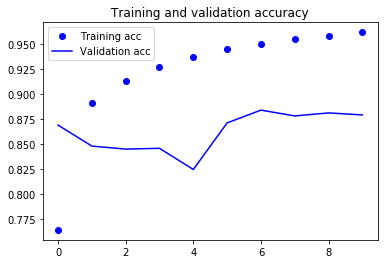

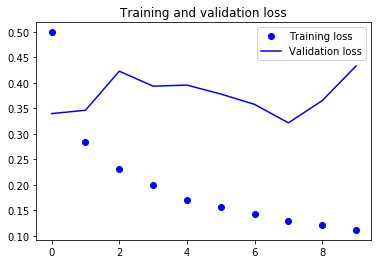

In [27]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()